#Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading Dataset

In [62]:
df = pd.read_csv("Advertising.csv")

In [63]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [64]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [65]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [66]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  200
Number of Columns:  5


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [68]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#Correlation Matrix

In [69]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


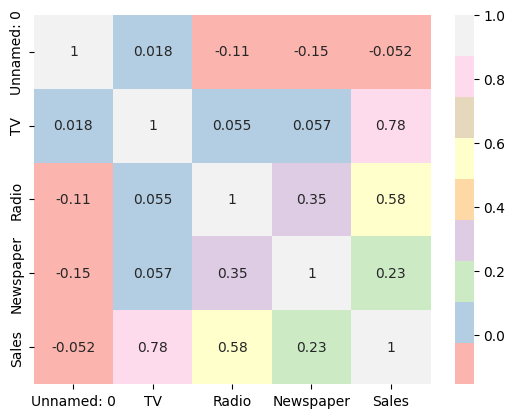

In [70]:
sns.heatmap(df.corr(),annot=True,cmap="Pastel1")
plt.show()

#Check for Missing Values

In [71]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#Checking for Duplicate Value

In [72]:
df.duplicated().values.sum()

0

#Droping "Unnamed:0" Column

In [73]:
df = df.drop('Unnamed: 0', axis=1)

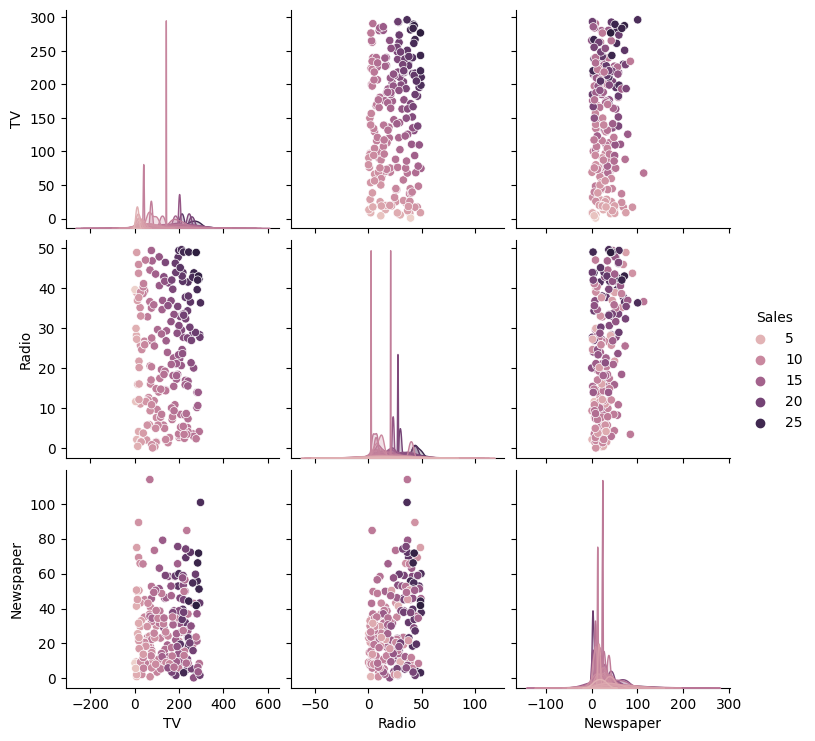

In [74]:
sns.pairplot(df,hue="Sales")
plt.show()

#Relationship Between Sales and TV Advertising

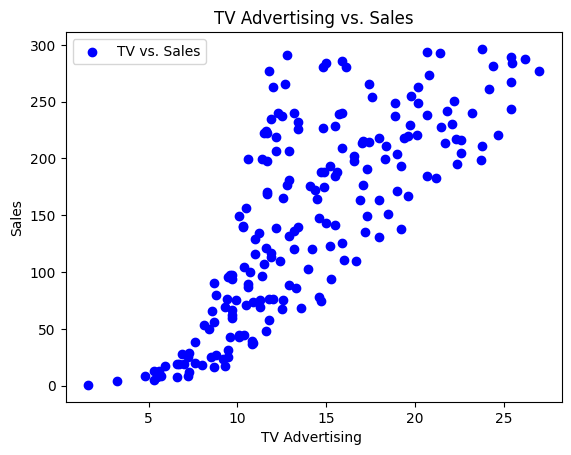

In [75]:
# Create a scatter plot
plt.scatter(df["Sales"],df["TV"] ,c='b', label='TV vs. Sales', marker='o')

# Add labels and title
plt.xlabel('TV Advertising ')
plt.ylabel('Sales')
plt.title('TV Advertising vs. Sales')

# Show legend
plt.legend(loc='upper left')

# Display the plot
plt.show()


#Relationship Between Sales and Newspaper Advertising

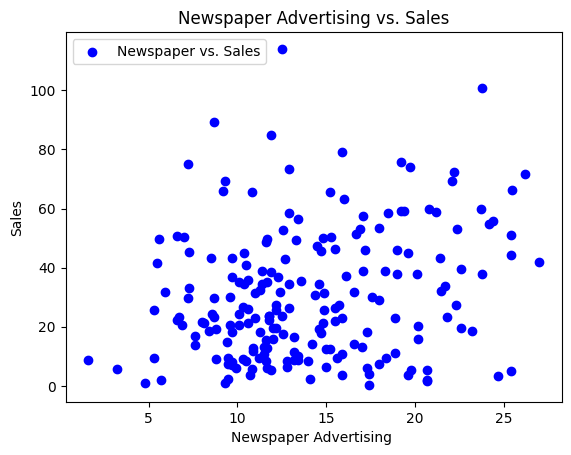

In [76]:
# Create a scatter plot
plt.scatter(df["Sales"],df["Newspaper"] ,c='b', label='Newspaper vs. Sales', marker='o')

# Add labels and title
plt.xlabel('Newspaper Advertising ')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs. Sales')

# Show legend
plt.legend(loc='upper left')

# Display the plot
plt.show()


#Relationship Between Sales and Radio Advertising

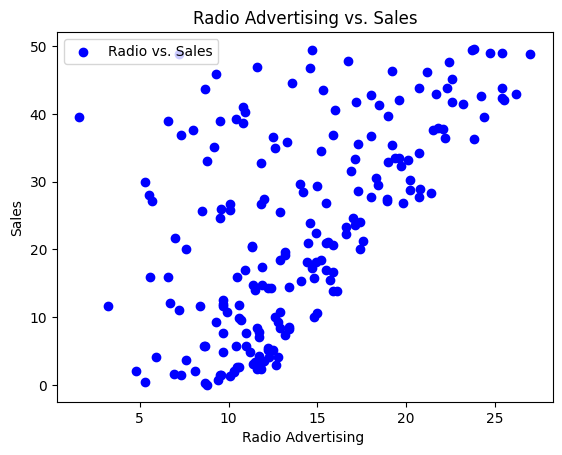

In [77]:
# Create a scatter plot
plt.scatter(df["Sales"],df["Radio"] ,c='b', label='Radio vs. Sales', marker='o')

# Add labels and title
plt.xlabel('Radio Advertising ')
plt.ylabel('Sales')
plt.title('Radio Advertising vs. Sales')

# Show legend
plt.legend(loc='upper left')

# Display the plot
plt.show()


#Model Training

In [78]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=["Sales"])
Y=df["Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

# Decision Tree Regression

In [79]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

#Calculate Accuracy from Mean Absolute Error

In [80]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error:", mae*100)

Mean Absolute Error: 88.00000000000003


#Calculate Accuracy from Metrics

In [81]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test,Y_pred)
print("R squared Error : ", error_score * 100)

R squared Error :  88.98142600359496


#Visualization

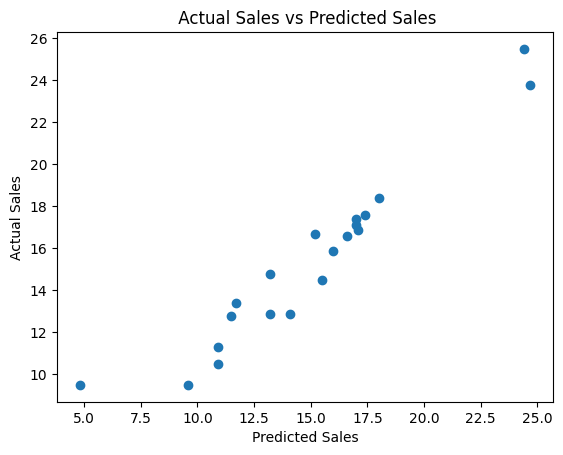

In [82]:
plt.scatter(Y_pred, Y_test)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title(" Actual Sales vs Predicted Sales")
plt.show()